In [1]:
import pdfplumber
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [2]:
with pdfplumber.open(r'/Users/macbookpro/Downloads/Flux_data_scientist.pdf') as pdf:
    pages = [page.extract_text() for page in pdf.pages]

In [3]:
# Pre Processing functions

import nltk
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('punkt')
import re
import string

def remove_emoji(text):
    emoji_pattern = re.compile("["
      u"\U0001F600-\U0001F64F"
      u"\U0001F300-\U0001F5FF"  
      u"\U0001F680-\U0001F6FF" 
      u"\U0001F1E0-\U0001F1FF"  
      u"\U0001F1F2-\U0001F1F4"  
      u"\U0001F1E6-\U0001F1FF" 
      u"\U0001F600-\U0001F64F"
      u"\U00002702-\U000027B0"
      u"\U000024C2-\U0001F251"
      u"\U0001f926-\U0001f937"
      u"\U0001F1F2"
      u"\U0001F1F4"
      u"\U0001F620"
      u"\u200d"
      u"\u2640-\u2642"
      "]+", flags=re.UNICODE)
    text = emoji_pattern.sub(r'', text)
    return text

def remove_links(text):
    rem_url=re.sub('http\S+', '',text)
    rem_email=re.sub('\S*[a-zA-Z0-9._\-]+@[a-zA-Z0-9._\-]+.[a-zA-Z0-9_\-]+s*','',rem_url)
    return rem_email

def remove_art_connector(text):
    articles = {"GET","THEM","WHAT","OUT","FROM","HAVE","HERE","WE","ALL","THERE","TO","ALSO","AND","AS","BUT","YET","YOU","THE","WAS","FOR","ARE","THEY","THIS","THAT","WERE","WITH","YOUR","JUST","WILL","NOT"}
    return ' '.join([word for word in text.split() if (word not in articles)])
  
def remove_stopwords(text):
    stop_words = stopwords.words('english')
    return ' '.join([word for word in text.split() if (word not in stop_words)])
    
def remove_punc(text):
    return text.strip(string.punctuation)

def remove_mentions(text):
    return re.sub('[@]\w+\s*','',text)

def remove_hashtags(text):
    return re.sub('[#]\w+\s*','',text)

def remove_nline(text):
    return re.sub(r'\\N','',text)

def remove_short_words(text):
    return re.sub(r'\b\w{1,2}\b', '', text)

def filter_text(text):
    filtered_text = []
    for post in text:
        if type(post)==str:
            post = remove_short_words(remove_punc(remove_links(remove_emoji(remove_nline(remove_hashtags(remove_mentions(remove_art_connector(remove_stopwords(post.upper())))))))))
            filtered_text.append(post)
    return filtered_text

def gen_word_cloud(text, c):
    if c == 'rainbow':
        cm = 'rainbow'
        bg = 'navy'
    elif c == 'navy':
        cm = 'Set2'
        bg = 'navy'
        
    wordcloud = WordCloud(width = 2550, height = 1600, random_state=42, background_color=bg, colormap=cm, collocations=False, min_word_length=3).generate(text)
    plt.figure(figsize=(10, 10), dpi=300)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()
    return wordcloud.process_text(text)

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/macbookpro/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/macbookpro/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [4]:
filtered_pdf = ' '.join(filter_text(pages))

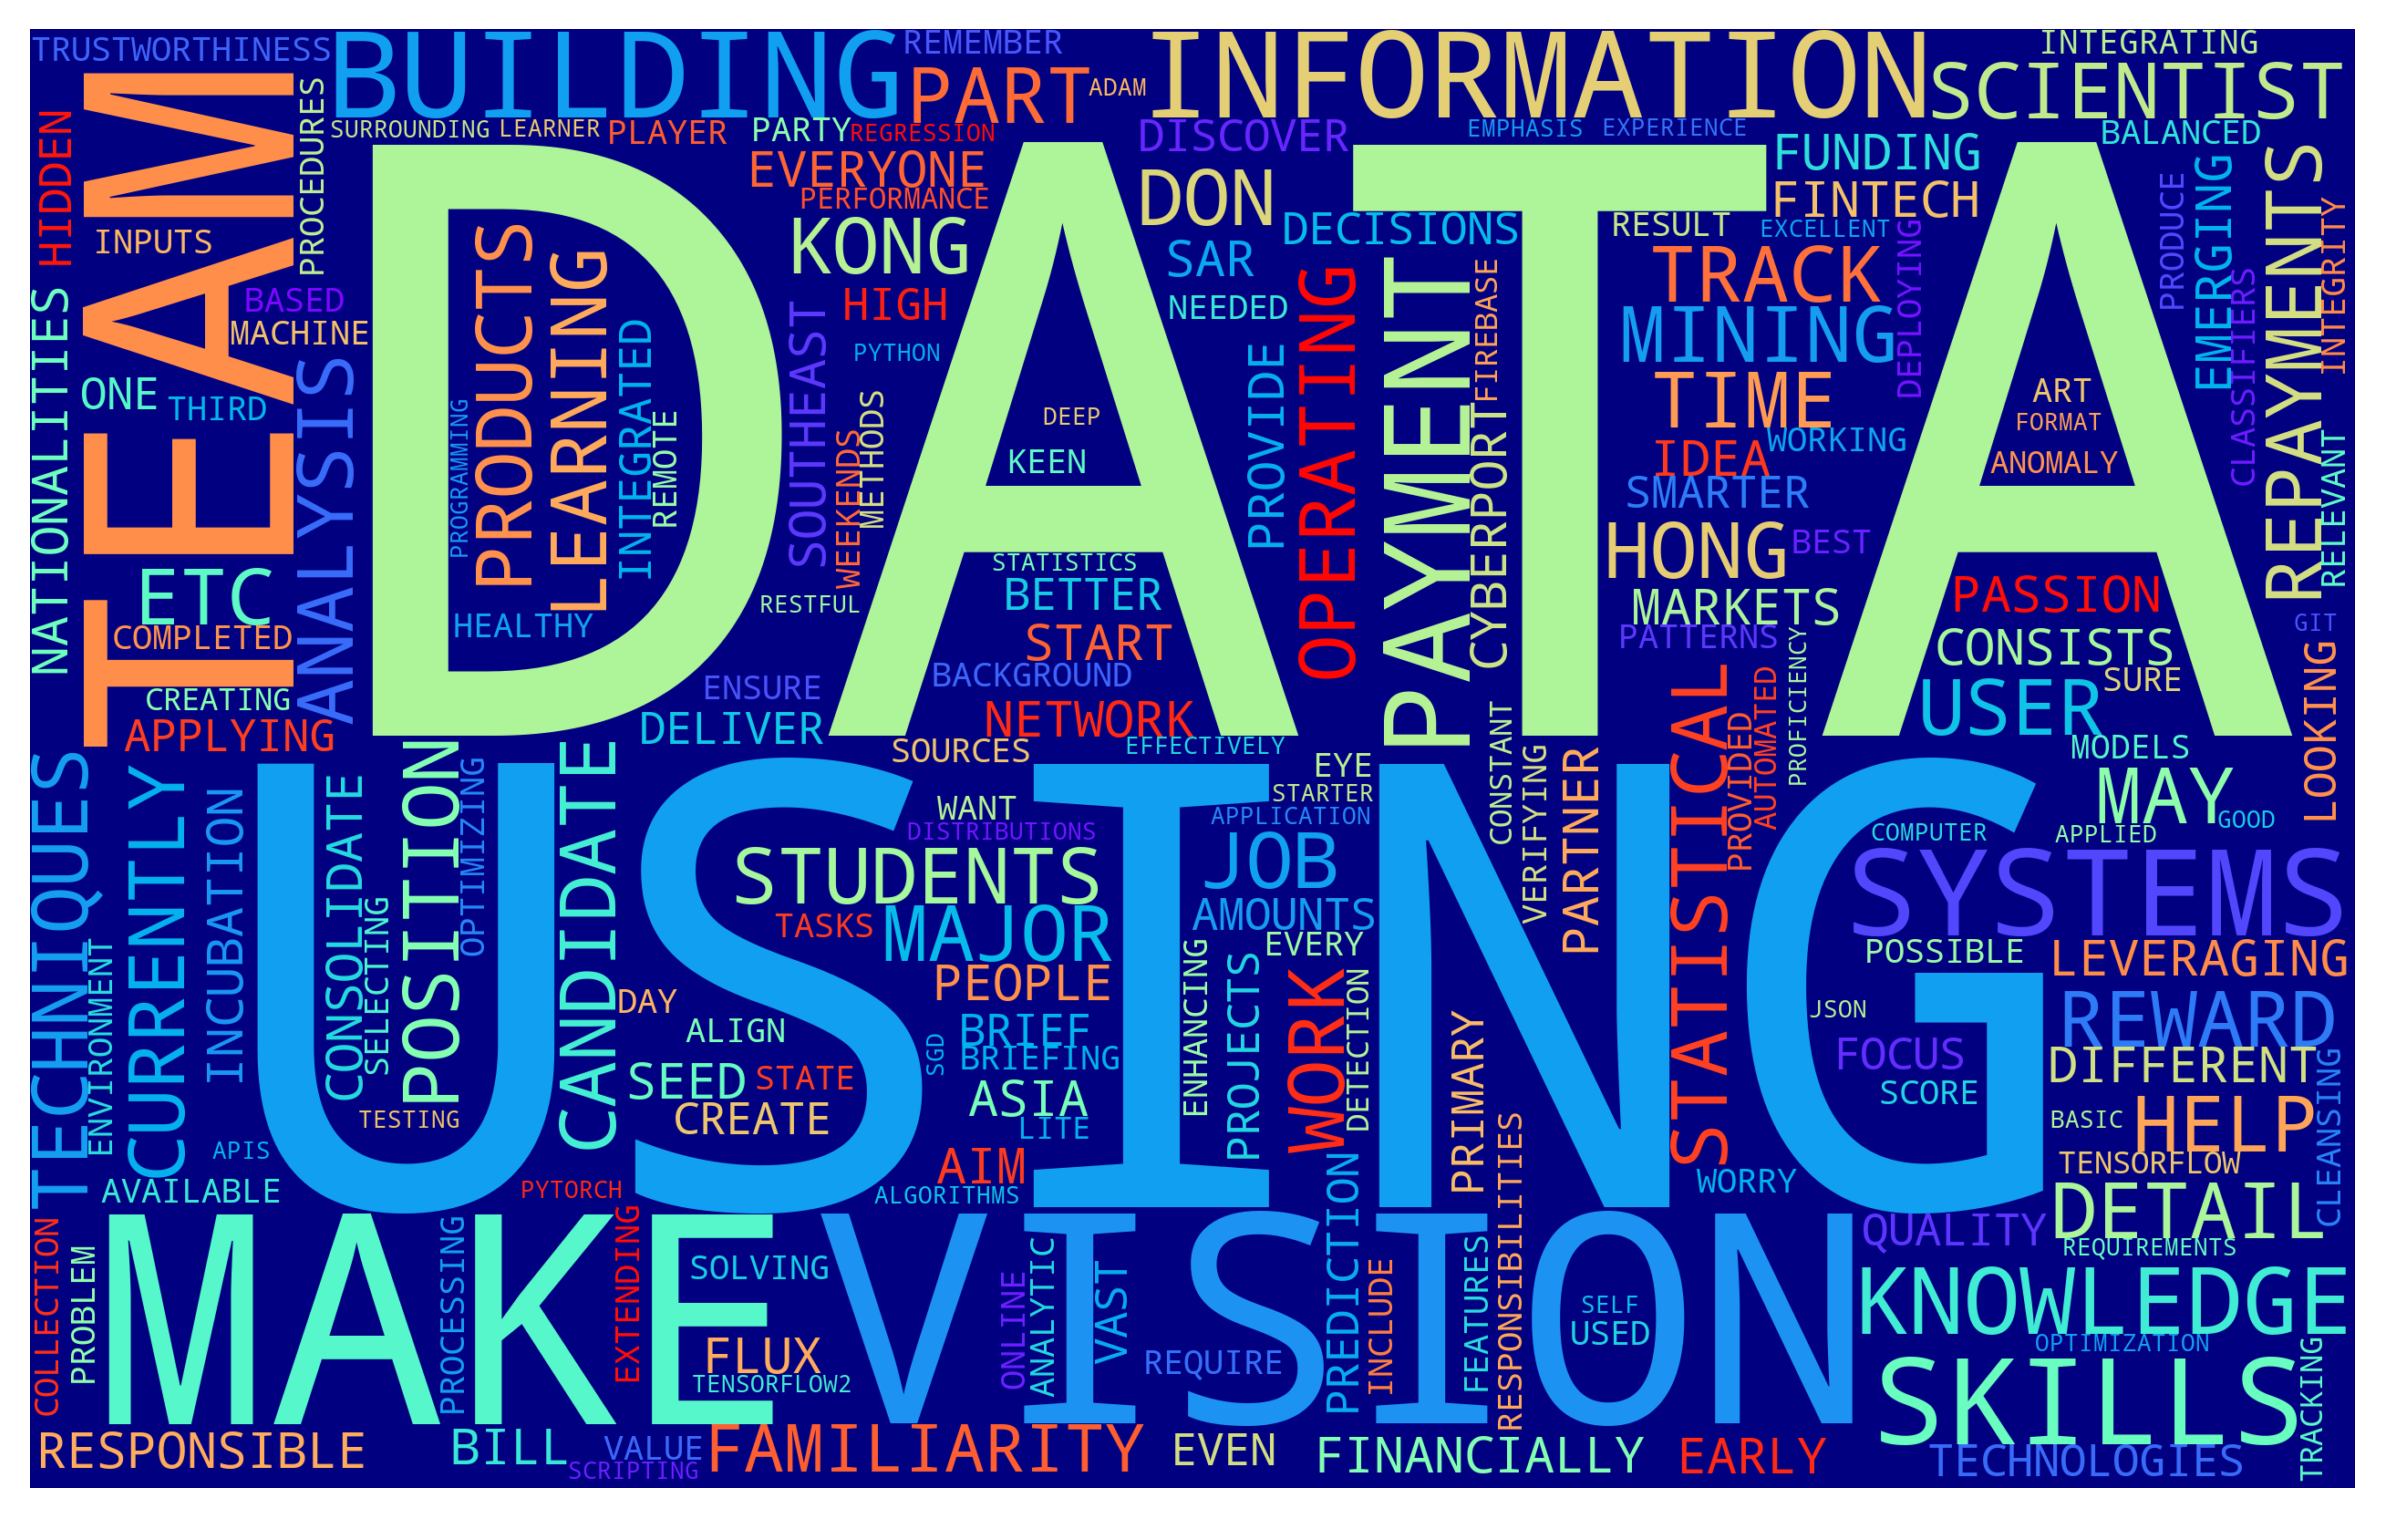

In [5]:
cloud = gen_word_cloud(filtered_pdf, 'rainbow')